In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""Creating training set"""
def createTrain():
    x = np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
    y = np.array([[1],[0],[0],[1]])
    return x,y

x_train, y_train = createTrain()
epochs = 20000
alpha = 0.05

In [3]:
"""Sigmoid function"""
def sigmoid(val):
    val = np.array(val)
    return 1 / (1 + np.exp(-val))

"""forward Propogation"""
def forwardProp(x_train, weight1, weight2):
    activ1 = np.matmul(x_train,weight1)
    temp_pred1 = sigmoid(activ1)
    length = len(temp_pred1)
    
    temp_pred1 = np.concatenate((np.ones((length,1)),temp_pred1),axis = 1)
    activ2 = np.matmul(temp_pred1,weight2)
    temp_pred2 = sigmoid(activ2)
    
    return activ1, temp_pred1, activ2, temp_pred2
    
"""Backward Propogation"""
def backwardProp(x_train, y_train, temp_pred1, temp_pred2, activ1, weight2):
    secondDiff = temp_pred2 - y_train
    secondDer = np.matmul(temp_pred1.T,secondDiff)
    
    tempWeight = weight2[1:,:].T
    sig = sigmoid(activ1)
    
    firstDiff = (secondDiff.dot(tempWeight) * sig * (1 - sig))
    firstDer = np.matmul(x_train.T,firstDiff)
    
    return secondDiff, secondDer, firstDer
    

"""Update weights"""
def updateWeight(weight1, weight2, firstDer, secondDer, alpha, length):
    weight1 = weight1 - ((alpha/length) * firstDer)
    weight2 = weight2 - ((alpha/length) * secondDer)
    return weight1, weight2

"""ANN"""
def ANN(x_train, y_train, epochs, alpha):
    weight1 = np.random.randn(3,5)
    weight2 = np.random.randn(6,1)
    cost = list()
    
    for i in range(epochs):
        activ1, temp_pred1, activ2, temp_pred2 = forwardProp(x_train, weight1, weight2)
        secondDiff, secondDer, firstDer = backwardProp(x_train, y_train, temp_pred1, temp_pred2, activ1, weight2)
        weight1, weight2 = updateWeight(weight1, weight2, firstDer, secondDer, alpha, len(x_train))
        cost.append(np.mean(np.abs(secondDiff)))

    return weight1, weight2, cost
    
"""Predict Function"""
def predict(x_test,weight1,weight2):
    activ1, pred1, activ2, y_pred = forwardProp(x_test, weight1, weight2)
    return y_pred

"""Calculate Accuracy"""
def calcAcc(y_pred,y_test):
    acc = np.sum(np.abs(np.round(y_pred) - y_test))
    return ((len(y_pred) - acc)/len(y_pred) * 100)

The accuracy of our trained model is  100.0 %


Text(0, 0.5, 'Errors')

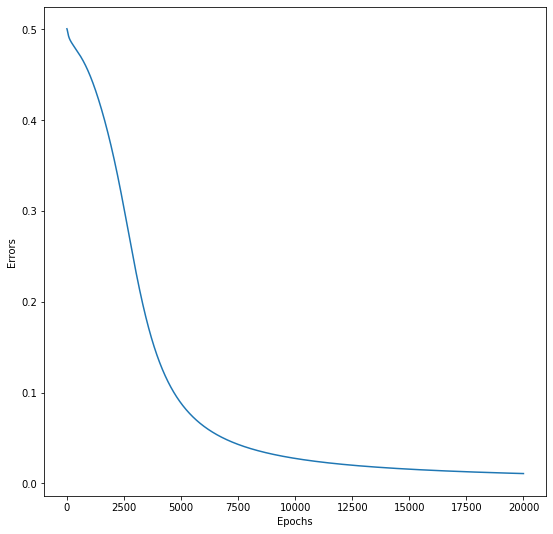

In [4]:
weight1, weight2, cost = ANN(x_train, y_train, epochs, alpha)
y_pred = predict(x_train,weight1,weight2)
acc = calcAcc(y_pred,y_train)
print("The accuracy of our trained model is ",acc,"%")
plt.figure(figsize = (9,9))
plt.plot(range(epochs),cost)
plt.xlabel("Epochs")
plt.ylabel("Errors")